In [8]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [9]:
%pip install numpy pandas seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [14]:
import pandas as pd
data = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
)
X = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
)
data.head(), X.head()

(   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
 0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
 1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
 2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
 3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
 4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
 
        Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
 0    None None        1     False   False  False        NaN    1.0   
 1    None None        1     False   False  False        NaN    1.0   
 2    None None        1     False   False  False        NaN    1.0   
 3  False Ocean        1     False   False  False        NaN    1.0   
 4    None None        1     False   False  False        NaN    1.0   
 
    ReusedCount Serial   Longitude   Latitude  Class  
 0            0  B0003  -80.577366 

In [15]:
Y = data['Class'].to_numpy()

In [16]:
from sklearn import preprocessing

transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)


In [18]:
Y_test.shape

(18,)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)


,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l2'], 'solver': ['lbfgs']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [20]:
print("best parameters:", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)


best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.8464285714285713


Test accuracy: 0.8333333333333334


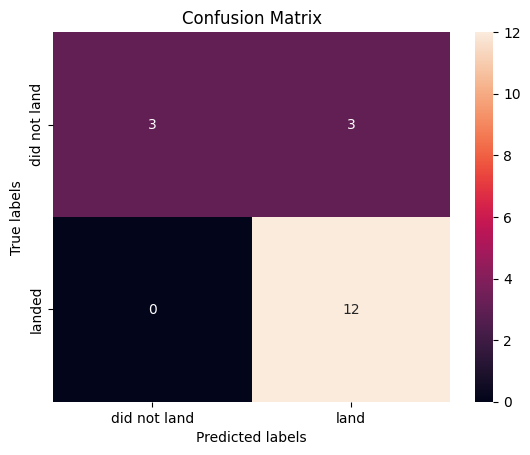

In [21]:
print("Test accuracy:", logreg_cv.score(X_test, Y_test))

yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [22]:
from sklearn.svm import SVC

parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)


,estimator,SVC()
,param_grid,"{'C': array([1.0000...00000000e+03]), 'gamma': array([1.0000...00000000e+03]), 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [23]:
print("best parameters:", svm_cv.best_params_)
print("accuracy:", svm_cv.best_score_)


best parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy: 0.8482142857142856


Test accuracy: 0.8333333333333334


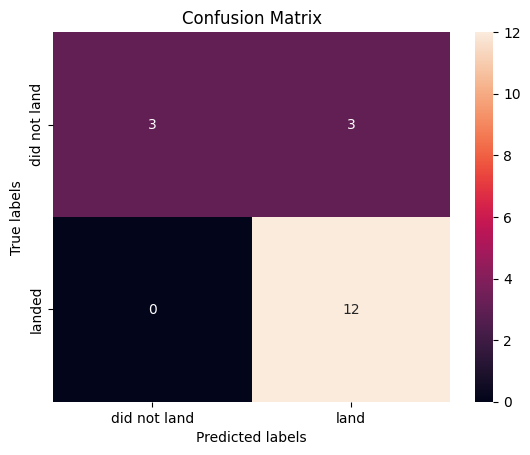

In [24]:
print("Test accuracy:", svm_cv.score(X_test, Y_test))

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [25]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2**n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)


C:\Users\Vinay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vinay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vinay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\Vinay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [26]:
print("best parameters:", tree_cv.best_params_)
print("accuracy:", tree_cv.best_score_)


best parameters: {'criterion': 'gini', 'max_depth': 256, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy: 0.8892857142857142


Test accuracy: 0.6666666666666666


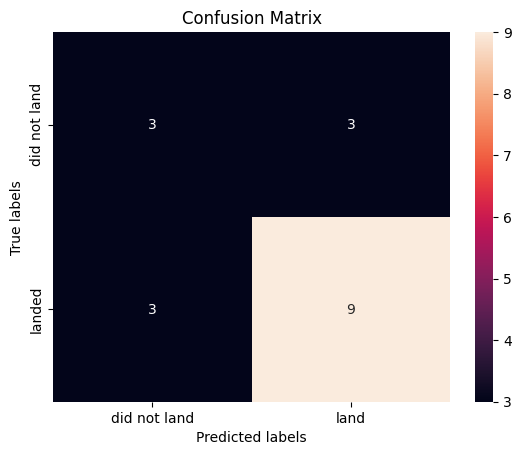

In [27]:
print("Test accuracy:", tree_cv.score(X_test, Y_test))

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)


,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'n_neighbors': [1, 2, ...], 'p': [1, 2]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,10


In [29]:
print("best parameters:", knn_cv.best_params_)
print("accuracy:", knn_cv.best_score_)


best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy: 0.8482142857142858


Test accuracy: 0.8333333333333334


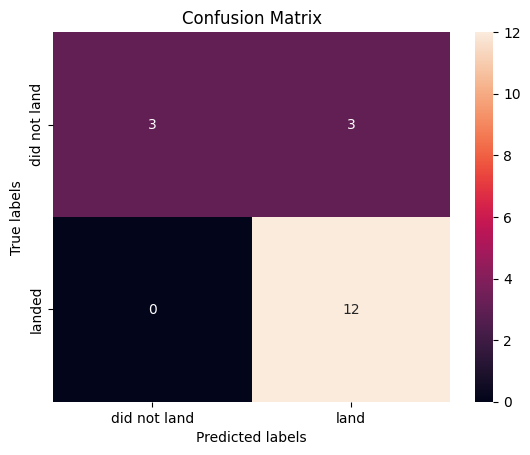

In [30]:
print("Test accuracy:", knn_cv.score(X_test, Y_test))

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)
